In [69]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")

In [70]:
data = pd.read_csv("NB_FlightDelays.csv")
data.head(10) #target = delay e ['ontime', 'delayed']

,schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime
5,840,DH,839,JFK,228,1/1/2004,7800,IAD,0,4,1,N687BR,ontime
6,1240,DH,1243,JFK,228,1/1/2004,7806,IAD,0,4,1,N321UE,ontime
7,1645,DH,1644,JFK,228,1/1/2004,7810,IAD,0,4,1,N301UE,ontime
8,1715,DH,1710,JFK,228,1/1/2004,7812,IAD,0,4,1,N328UE,ontime
9,2120,DH,2129,JFK,228,1/1/2004,7814,IAD,0,4,1,N685BR,ontime


<h3>Analisis</h3>


<ul>
    <li><b>schedtime:</b> son muchos valores (59) y no se que es [ 600 , 2130 ]:  indicate the scheduled departure time in 24-hour format. For example, 600 corresponds to 6:00 AM, and 2130 corresponds to 9:30 PM.
    <li><b>carrier  :</b> <i>['OH', 'DH', 'DL', 'MQ', 'UA', 'US', 'RU', 'CO']</i>:  likely correspond to different airline carriers. Each carrier is identified by its unique two-letter code.
    <li><b>deptime  :</b> son muchos+ valores (633) y no se que es [ 10 , 2330 ]: this variable probably represents the actual departure time of flights. The values in the range indicate the actual departure time in 24-hour format.
    <li><b>dest     :</b> <i>['JFK', 'LGA', 'EWR']</i>
    <li><b>distance :</b> <i>[184, 213, 229, 228, 214, 169, 199]</i>, es continuo pero toma pocos valores (7) [ 169 , 229 ]
    <li>---->*borrar*<b>date:    </b> todo mes de enero de 2004 '1/x/2004' x va de 1 a 31  ---> [!] es redundante con <b>daymonth</b> 
    <li><b>flightnumber:</b> 103 valores [ 746 , 7924 ]
    <li><b>origin:  </b> <i>['JFK', 'LGA', 'EWR']</i>
    <li><b>weather	:</b> <i>[0, 1]</i>
    <li><b>dayweek	:</b> <i>[1, 7]</i>
    <li><b>daymonth	:</b> <i>[1, 31]</i>
    <li><b>tailnu   :</b> son muchos valores (549) y no se que es: The variable "tailnu" is likely representing the tail number of aircraft. In aviation, the tail number is a unique identifier for individual aircraft, typically displayed on the tail of the aircraft. Tail numbers are also known as registration numbers.
    <li><b>delay	:</b> <i>['ontime', 'delayed']</i>
</ul>

borramos date

In [71]:
#delete date column 
data.drop('date', axis=1, inplace=True)
data.head(10)

,schedtime,carrier,deptime,dest,distance,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,1455,OH,1455,JFK,184,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,7792,IAD,0,4,1,N698BR,ontime
5,840,DH,839,JFK,228,7800,IAD,0,4,1,N687BR,ontime
6,1240,DH,1243,JFK,228,7806,IAD,0,4,1,N321UE,ontime
7,1645,DH,1644,JFK,228,7810,IAD,0,4,1,N301UE,ontime
8,1715,DH,1710,JFK,228,7812,IAD,0,4,1,N328UE,ontime
9,2120,DH,2129,JFK,228,7814,IAD,0,4,1,N685BR,ontime


In [72]:
#unique values of delay columns 
data['tailnu'].nunique()



549

<h2>TAILNU</h2>

hay un cambio en el numero de caracteres para 'tailnu'? 

In [73]:
#number of unique values for number of characters in tail number column 
data['tailnu'].apply(lambda x: len(str(x))).nunique()
#data.head(2)

1

mejor diferenciamos por caracter final en tailnu 

In [74]:
data['tailnu'].apply(lambda x: str(x)[-1]).nunique()

20

aplicamos a la tabla

In [75]:
#number of unique values for last character in tail number column 
data['tailnu'] = data['tailnu'].apply(lambda x: str(x)[-1])
data.head(5) 


,schedtime,carrier,deptime,dest,distance,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,1455,OH,1455,JFK,184,5935,BWI,0,4,1,A,ontime
1,1640,DH,1640,JFK,213,6155,DCA,0,4,1,J,ontime
2,1245,DH,1245,LGA,229,7208,IAD,0,4,1,R,ontime
3,1715,DH,1709,LGA,229,7215,IAD,0,4,1,R,ontime
4,1039,DH,1035,LGA,229,7792,IAD,0,4,1,R,ontime


<h2>CONTINUOUS VARIABLES</h2>

In [76]:
cont_vars = ['schedtime', 'deptime', 'distance', 'flightnumber', 'dayweek', 'daymonth']

In [77]:
#list of ranges of every column features
ranges = []
for col in data.columns:
    if col in cont_vars:
        ranges.append([data[col].min(), data[col].max()])
        print(col,": [" , data[col].min(),",",  data[col].max(), "]" )
#ranges


schedtime : [ 600 , 2130 ]
deptime : [ 10 , 2330 ]
distance : [ 169 , 229 ]
flightnumber : [ 746 , 7924 ]
dayweek : [ 1 , 7 ]
daymonth : [ 1 , 31 ]


<h2>SCHELUDED AND ACTUAL DEPARTURE TIME</h2>

In [78]:
#divide schedtime and deptime by 100 to get hours and minutes
data['schedtime'] = data['schedtime'].apply(lambda x: x/100)
data['deptime'] = data['deptime'].apply(lambda x: x/100)
data.head(5)

,schedtime,carrier,deptime,dest,distance,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,14.55,OH,14.55,JFK,184,5935,BWI,0,4,1,A,ontime
1,16.40,DH,16.40,JFK,213,6155,DCA,0,4,1,J,ontime
2,12.45,DH,12.45,LGA,229,7208,IAD,0,4,1,R,ontime
3,17.15,DH,17.09,LGA,229,7215,IAD,0,4,1,R,ontime
4,10.39,DH,10.35,LGA,229,7792,IAD,0,4,1,R,ontime


In [79]:
# new columns with difference between scheduled and actual departure time if the day is the same

data['delay_val'] = data['deptime'] - data['schedtime']
data['abs_delay_val'] = abs( data['deptime'] - data['schedtime'] )

data.head(5)

,schedtime,carrier,deptime,dest,distance,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay,delay_val,abs_delay_val
0,14.55,OH,14.55,JFK,184,5935,BWI,0,4,1,A,ontime,0.00,0.00
1,16.40,DH,16.40,JFK,213,6155,DCA,0,4,1,J,ontime,0.00,0.00
2,12.45,DH,12.45,LGA,229,7208,IAD,0,4,1,R,ontime,0.00,0.00
3,17.15,DH,17.09,LGA,229,7215,IAD,0,4,1,R,ontime,-0.06,0.06
4,10.39,DH,10.35,LGA,229,7792,IAD,0,4,1,R,ontime,-0.04,0.04


In [80]:
data['delay_val'].min()

-21.099999999999998

In [81]:
#show the rows with the minimum delay value
data[data['delay_val'] == data['delay_val'].min()]

,schedtime,carrier,deptime,dest,distance,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay,delay_val,abs_delay_val
1270,21.2,DH,0.1,LGA,229,7684,IAD,0,1,19,R,delayed,-21.1,21.1


hay problema con los dias, creo. voy a <b>borrar deptime</b>, tenemos suficiente informacion con scheluded y delay

In [82]:
#delete depdtime, delay_val and abs_delay_val columns
data.drop(['deptime', 'delay_val', 'abs_delay_val'], axis=1, inplace=True)
data.head(5)

,schedtime,carrier,dest,distance,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,14.55,OH,JFK,184,5935,BWI,0,4,1,A,ontime
1,16.40,DH,JFK,213,6155,DCA,0,4,1,J,ontime
2,12.45,DH,LGA,229,7208,IAD,0,4,1,R,ontime
3,17.15,DH,LGA,229,7215,IAD,0,4,1,R,ontime
4,10.39,DH,LGA,229,7792,IAD,0,4,1,R,ontime


<h2>Discretizar para Naive Bayes</h2>

<h3>FLIGHT NUMBER</h3>

In [83]:
#sorted unique values of flight number column
#sorted(data['flightnumber'].unique())

In [84]:
#divide flightnumber by 100 and take the integer part
data['flightnumber'] = data['flightnumber'].apply(lambda x: int(x/100))
data.head(5)

,schedtime,carrier,dest,distance,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,14.55,OH,JFK,184,59,BWI,0,4,1,A,ontime
1,16.40,DH,JFK,213,61,DCA,0,4,1,J,ontime
2,12.45,DH,LGA,229,72,IAD,0,4,1,R,ontime
3,17.15,DH,LGA,229,72,IAD,0,4,1,R,ontime
4,10.39,DH,LGA,229,77,IAD,0,4,1,R,ontime


In [85]:
#divide flightnumber in segments by 1000
#data['flightnumber'] = data['flightnumber'].apply(lambda x: int(x/1000))
#data.head(5)

In [86]:
sorted(data['flightnumber'].unique())

[7,
 8,
 14,
 17,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 32,
 33,
 47,
 49,
 59,
 61,
 72,
 73,
 76,
 77,
 78,
 79]

In [87]:
#if <10 = 0 if >10 takethe first digit
data['flightnumber'] = data['flightnumber'].apply(lambda x: 0 if x<10 else int(str(x)[0]))
data.head(5)

,schedtime,carrier,dest,distance,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,14.55,OH,JFK,184,5,BWI,0,4,1,A,ontime
1,16.40,DH,JFK,213,6,DCA,0,4,1,J,ontime
2,12.45,DH,LGA,229,7,IAD,0,4,1,R,ontime
3,17.15,DH,LGA,229,7,IAD,0,4,1,R,ontime
4,10.39,DH,LGA,229,7,IAD,0,4,1,R,ontime


In [88]:
sorted(data['flightnumber'].unique())

[0, 1, 2, 3, 4, 5, 6, 7]

<h3>SCHEDTIME</h3>

In [89]:
#from schedtime column only take the integer part
data['schedtime'] = data['schedtime'].apply(lambda x: int(x))
data.head(5)

,schedtime,carrier,dest,distance,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,14,OH,JFK,184,5,BWI,0,4,1,A,ontime
1,16,DH,JFK,213,6,DCA,0,4,1,J,ontime
2,12,DH,LGA,229,7,IAD,0,4,1,R,ontime
3,17,DH,LGA,229,7,IAD,0,4,1,R,ontime
4,10,DH,LGA,229,7,IAD,0,4,1,R,ontime


In [90]:
sorted(data['schedtime'].unique())

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [91]:
#print unique values for every column
for col in data.columns:
    print(col, ":", data[col].unique())
    

schedtime : [14 16 12 17 10  8 21  9 20 15  6 18 13 19 11  7]
carrier : ['OH' 'DH' 'DL' 'MQ' 'UA' 'US' 'RU' 'CO']
dest : ['JFK' 'LGA' 'EWR']
distance : [184 213 229 228 214 169 199]
flightnumber : [5 6 7 0 1 4 2 3]
origin : ['BWI' 'DCA' 'IAD']
weather : [0 1]
dayweek : [4 5 6 7 1 2 3]
daymonth : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
tailnu : ['A' 'J' 'R' 'E' 'L' 'Q' 'W' '6' '4' '9' '1' '7' '0' '3' '2' '8' '5' 'Z'
 'N' 'B']
delay : ['ontime' 'delayed']


<h3>defining weekmonth</h3>

In [92]:
#divide daymonth in weeks and change name to weekmonth
data['daymonth'] = data['daymonth'].apply(lambda x: int(x/7))
data.rename(columns={'daymonth':'weekmonth'}, inplace=True)
data.head(5)

#ata['daymonth'] = data['daymonth'].apply(lambda x: int(x/7))
#data.head(5)


,schedtime,carrier,dest,distance,flightnumber,origin,weather,dayweek,weekmonth,tailnu,delay
0,14,OH,JFK,184,5,BWI,0,4,0,A,ontime
1,16,DH,JFK,213,6,DCA,0,4,0,J,ontime
2,12,DH,LGA,229,7,IAD,0,4,0,R,ontime
3,17,DH,LGA,229,7,IAD,0,4,0,R,ontime
4,10,DH,LGA,229,7,IAD,0,4,0,R,ontime


In [93]:
#print unique values for every column
for col in data.columns:
    print(col, ":", data[col].unique())
    

schedtime : [14 16 12 17 10  8 21  9 20 15  6 18 13 19 11  7]
carrier : ['OH' 'DH' 'DL' 'MQ' 'UA' 'US' 'RU' 'CO']
dest : ['JFK' 'LGA' 'EWR']
distance : [184 213 229 228 214 169 199]
flightnumber : [5 6 7 0 1 4 2 3]
origin : ['BWI' 'DCA' 'IAD']
weather : [0 1]
dayweek : [4 5 6 7 1 2 3]
weekmonth : [0 1 2 3 4]
tailnu : ['A' 'J' 'R' 'E' 'L' 'Q' 'W' '6' '4' '9' '1' '7' '0' '3' '2' '8' '5' 'Z'
 'N' 'B']
delay : ['ontime' 'delayed']


<h1>GRAFICAS</h1>

<Axes: >

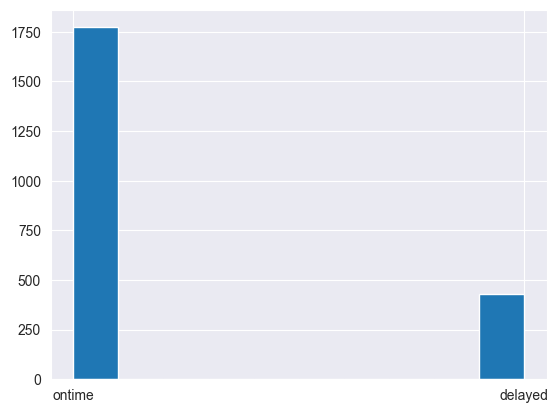

In [94]:
data["delay"].hist()

<Axes: >

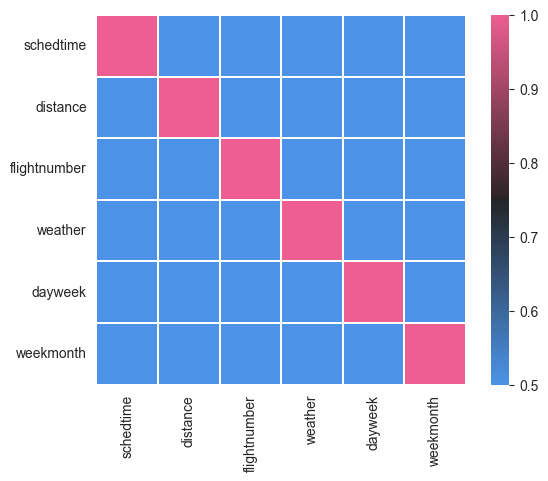

In [95]:
#correration matrix for continous variables
cont_vars = ['schedtime', 'distance', 'flightnumber', 'weather' ,'dayweek', 'weekmonth']
corr = data[cont_vars].corr(method="pearson")

cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=.5, cmap=cmap, square=True, linewidths=.2)


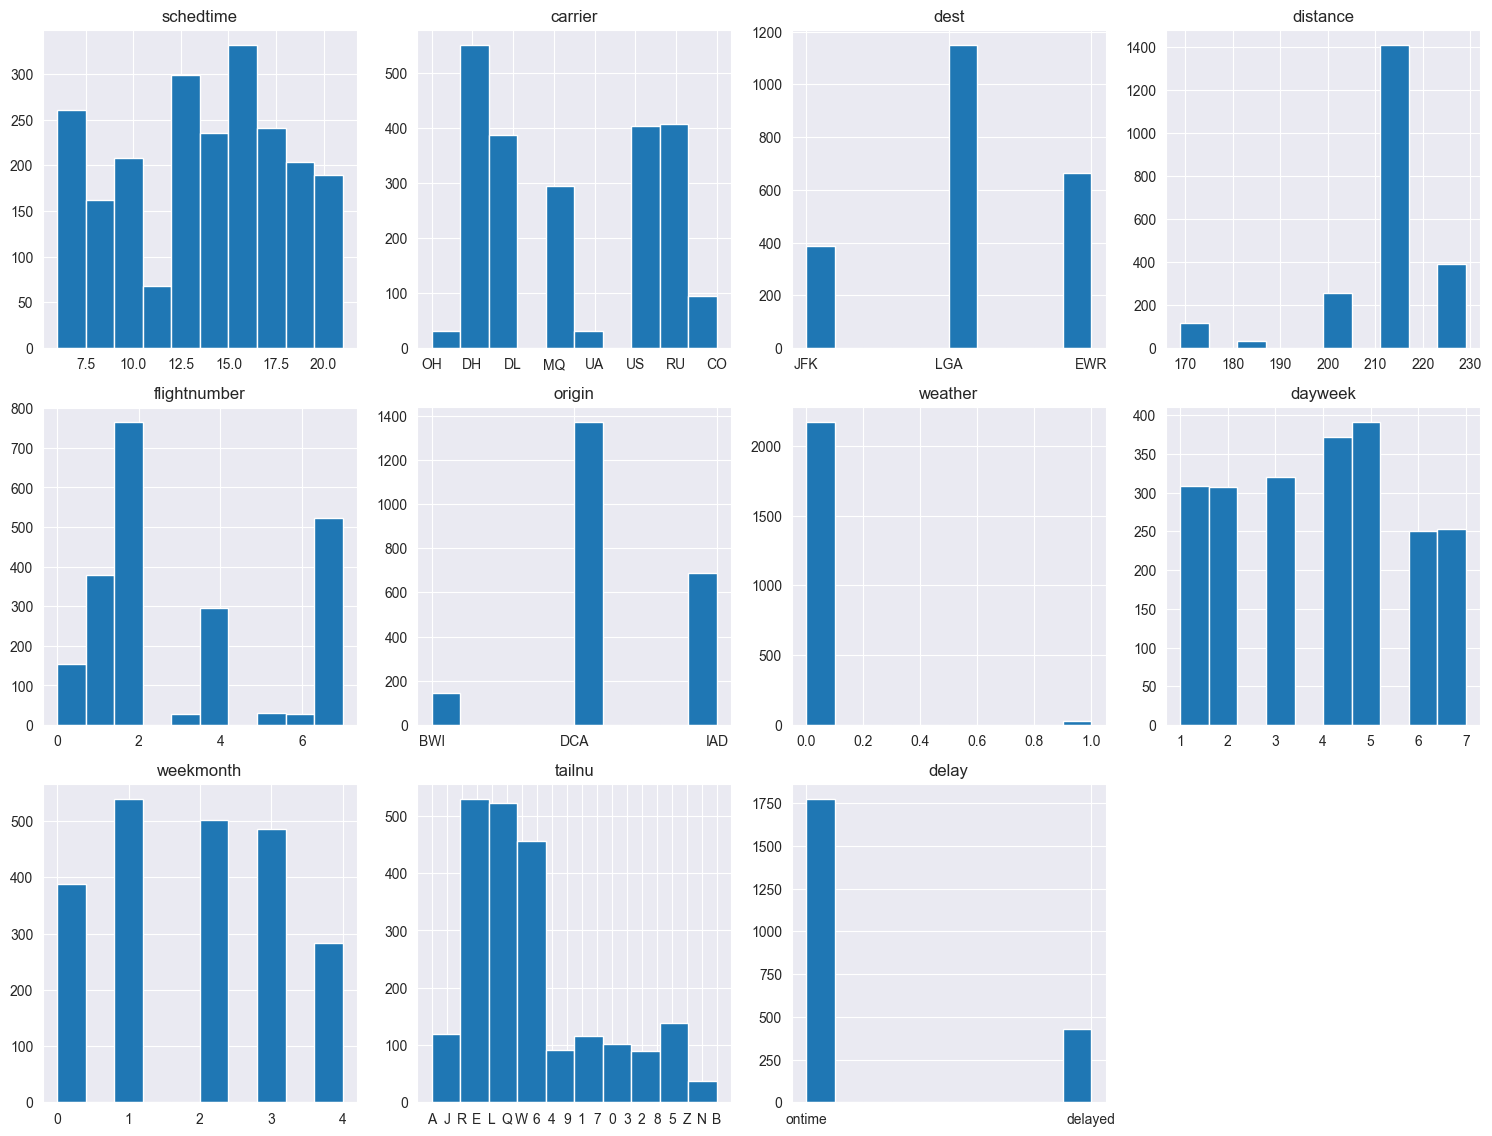

In [96]:
#plot simple frecuency histogram for every column in the same figure
plt.figure(figsize=(15, 15))
for i, col in enumerate(data.columns):
    plt.subplot(4, 4, i+1)
    data[col].hist()
    plt.title(col)
plt.tight_layout()
plt.show()

    


In [97]:
#count the number of weather = 1 files 
data['weather'].value_counts()


weather
0    2169
1      32
Name: count, dtype: int64

<h3>Discretizamos para el algoritmo</h3>

asi esta bien ya

In [98]:
sorted(data['distance'].unique())

[169, 184, 199, 213, 214, 228, 229]

categorizamos las distancias

In [99]:
#distance values = [169, 184, 199, 213, 214, 228, 229]
#divide distance in small, medium and large

#data['distance'] = data['distance'].apply(lambda x: 'small' if x<200 else ('medium' if x<225 else 'large'))


In [100]:
data.head(10)

,schedtime,carrier,dest,distance,flightnumber,origin,weather,dayweek,weekmonth,tailnu,delay
0,14,OH,JFK,184,5,BWI,0,4,0,A,ontime
1,16,DH,JFK,213,6,DCA,0,4,0,J,ontime
2,12,DH,LGA,229,7,IAD,0,4,0,R,ontime
3,17,DH,LGA,229,7,IAD,0,4,0,R,ontime
4,10,DH,LGA,229,7,IAD,0,4,0,R,ontime
5,8,DH,JFK,228,7,IAD,0,4,0,R,ontime
6,12,DH,JFK,228,7,IAD,0,4,0,E,ontime
7,16,DH,JFK,228,7,IAD,0,4,0,E,ontime
8,17,DH,JFK,228,7,IAD,0,4,0,E,ontime
9,21,DH,JFK,228,7,IAD,0,4,0,R,ontime


In [101]:
#export data to csv file 
data.to_csv("NB_FlightDelays_prepared.csv", index=False)